**Customer Churn Prediction**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       10 non-null     int64  
 1   Gender           10 non-null     object 
 2   Age              10 non-null     int64  
 3   Tenure           10 non-null     int64  
 4   Balance          10 non-null     float64
 5   NumOfProducts    10 non-null     int64  
 6   HasCrCard        10 non-null     object 
 7   IsActiveMember   10 non-null     object 
 8   EstimatedSalary  10 non-null     int64  
 9   Exited           10 non-null     int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 928.0+ bytes
None
       CustomerID        Age     Tenure        Balance  NumOfProducts  \
count    10.00000  10.000000  10.000000      10.000000      10.000000   
mean   1005.50000  36.800000   5.100000   52800.260000       1.800000   
std       3.02765   7.254118   2.766867   34389.396364 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Random Forest Confusion Matrix:
 [[1 0]
 [1 0]]
Random Forest Accuracy: 0.5
Random Forest Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Decision Tree Confusion Matrix:
 [[1 0]
 [0 1]]
Decision Tree Accuracy: 1.0
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



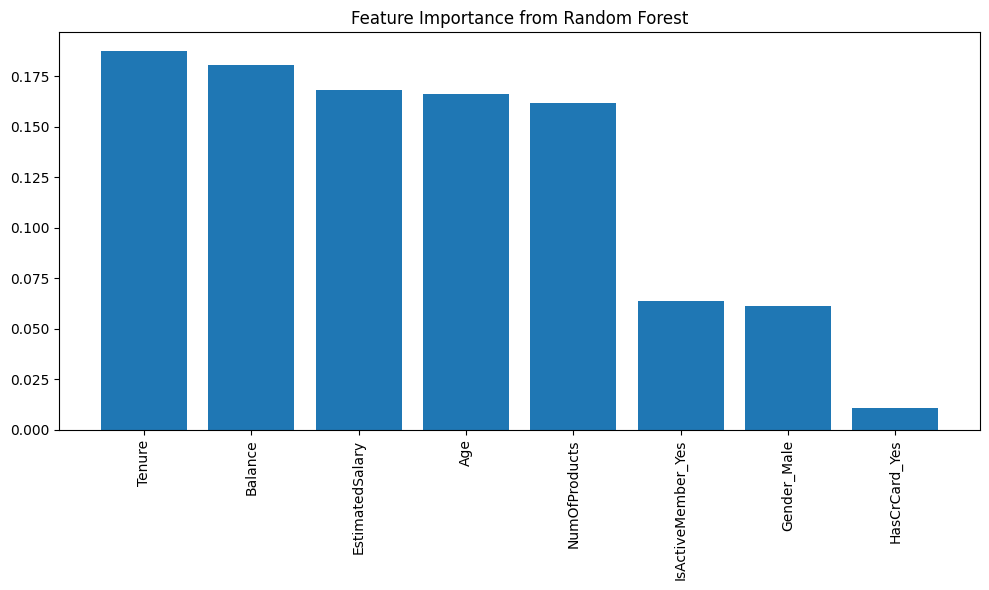

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Load dataset
# Assume the CSV is named 'churn_data.csv'
data = pd.read_csv('churn_data.csv')

# Display basic information about the dataset
print(data.info())
print(data.describe())

# Data Preprocessing
# Drop the CustomerID column as it is not a predictive feature
data = data.drop(columns=['CustomerID'])

# Handling categorical data (assuming 'Gender' is categorical)
data = pd.get_dummies(data, drop_first=True)

# Splitting the data into features (X) and target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']

# Splitting into training and testing datasets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_log = log_model.predict(X_test)

# Confusion Matrix & Accuracy for Logistic Regression
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix & Accuracy for Random Forest
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predicting the test set results
y_pred_dt = dt_model.predict(X_test)

# Confusion Matrix & Accuracy for Decision Tree
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

# Visualizing feature importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title('Feature Importance from Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
